In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

In [5]:
df = pd.read_csv(r"D:\Open Classroom\Data Files\HR Analytics change for DS\aug_test.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [14]:
df_group = df.groupby(["gender", "relevent_experience", "enrolled_university", "education_level"]).agg({"max", "mean", "min"}).style.background_gradient(cmap = "Greens")
df_group

In [16]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


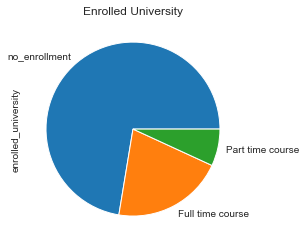

In [25]:
enrolled = df["enrolled_university"].value_counts()
sb.set_style(style = "white")
enrolled.plot(kind = "pie", title = "Enrolled University")

In [26]:
df.dropna(axis = "index", how = "any")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


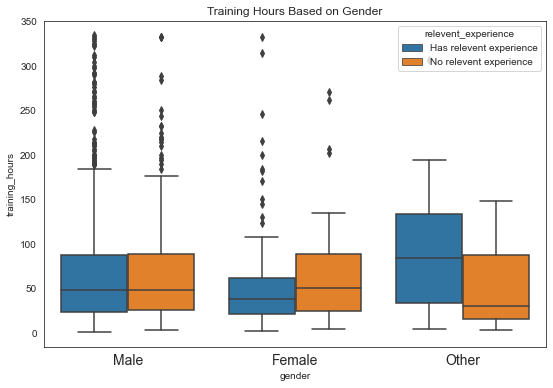

In [36]:
plt.figure(figsize = (9, 6))
training_hours = sb.boxplot(x = "gender", y = "training_hours", data = df, hue = "relevent_experience")
plt.title("Training Hours Based on Gender")
plt.xticks(fontsize = (14))
training_hours

Text(0.5, 1.0, 'Employee Company Type Based on Gender')

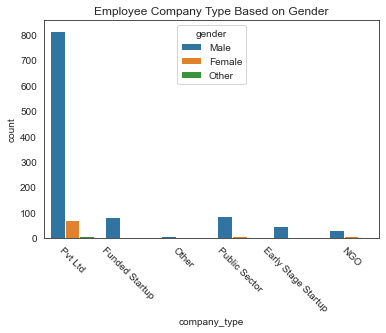

In [48]:
sb.countplot(x = "company_type", data = df, hue = "gender")
plt.xticks(rotation = -45)
plt.title("Employee Company Type Based on Gender")

(array([-100.,    0.,  100.,  200.,  300.,  400.]),
 <a list of 6 Text major ticklabel objects>)

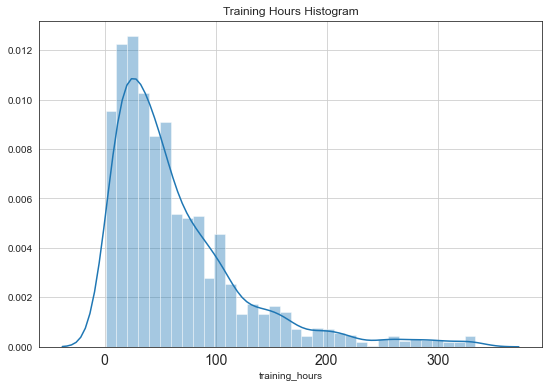

In [59]:
plt.figure(figsize = (9, 6))
training_hist = sb.distplot(df["training_hours"])
plt.grid()
plt.title("Training Hours Histogram")
plt.xticks(fontsize = (14))

c:\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


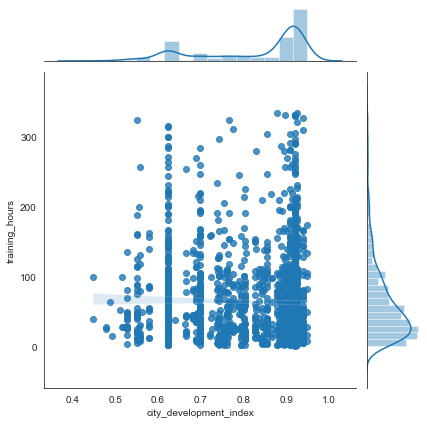

In [75]:
dev_vs_traininghours = sb.jointplot(x = "city_development_index", y = "training_hours", data = df, kind = "reg")
dev_vs_traininghours

## Human Development Index
#### The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. 
#### The standard of living dimension is measured by gross national income per capita.